# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.formula.api import ols

from plotly import express as px
import plotly.graph_objects as go

## 0.1 Helper Functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [5]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# Exemplo 10.1 Consumo - Renda - Riqueza

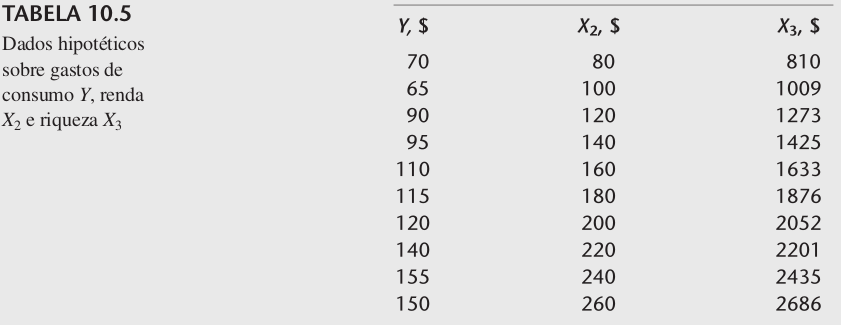

In [6]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_tabela_10.5.png')

In [7]:
aux1 = {'consumo':[70,65,90,95,110,115,120,140,155,150],
        'renda':[80,100,120,140,160,180,200,220,240,260],
        'riqueza':[810,1009,1273,1425,1633,1876,2052,2201,2435,2686]}

data = pd.DataFrame(aux1)

In [8]:
data

,consumo,renda,riqueza
0,70,80,810
1,65,100,1009
2,90,120,1273
3,95,140,1425
4,110,160,1633
5,115,180,1876
6,120,200,2052
7,140,220,2201
8,155,240,2435
9,150,260,2686


In [9]:
#statsmodels
x = data[['renda','riqueza']]
y = data['consumo']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     92.40
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           9.29e-06
Time:                        20:56:02   Log-Likelihood:                -31.587
No. Observations:                  10   AIC:                             69.17
Df Residuals:                       7   BIC:                             70.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7747      6.752      3.669      0.0

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


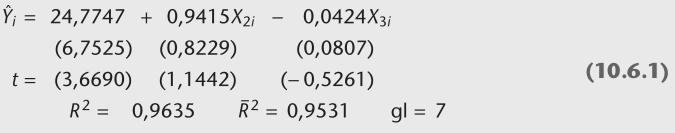

In [10]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.1_1.png')

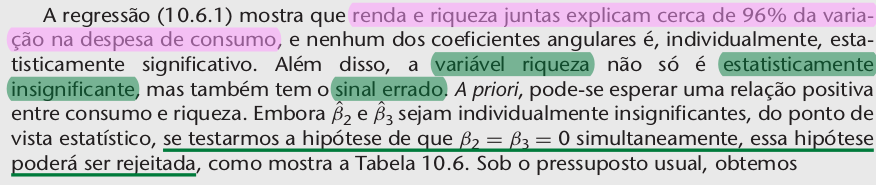

In [11]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.1_1_1.png')

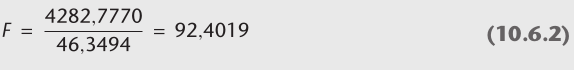

In [12]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.1_2.png')

## Regressão Riqueza vs Renda

In [13]:
x = data[['renda']]
y = data['riqueza']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                riqueza   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3849.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           5.06e-12
Time:                        20:56:02   Log-Likelihood:                -47.032
No. Observations:                  10   AIC:                             98.06
Df Residuals:                       8   BIC:                             98.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5455     29.476      0.256      0.8

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


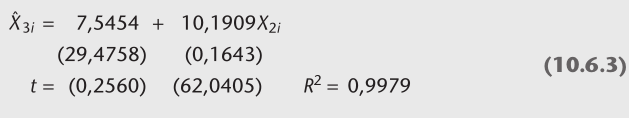

In [14]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.1_3.png')

## Regressão Consumo vs Renda

In [15]:
# statsmodels
x = data[['renda']]
y = data['consumo']
# adicionar constante
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           5.75e-07
Time:                        20:56:02   Log-Likelihood:                -31.781
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       8   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4545      6.414      3.813      0.0

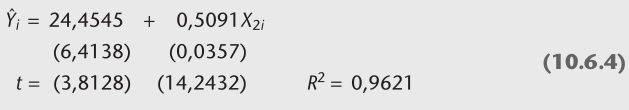

In [16]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.1_4.png')

## Regressão Consumo vs Riqueza

In [17]:
# statsmodels
x = data[['riqueza']]
y = data['consumo']
# adicionar constante
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     176.7
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           9.80e-07
Time:                        20:56:02   Log-Likelihood:                -32.444
No. Observations:                  10   AIC:                             68.89
Df Residuals:                       8   BIC:                             69.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4110      6.874      3.551      0.0

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


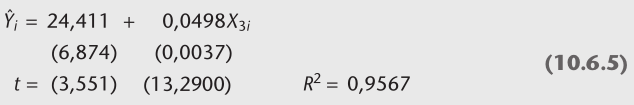

In [18]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.1_5.png')

## Intervalos de confiança

In [19]:
# statsmodels
x = data[['renda','riqueza']]
y = data['consumo']
# adicionar intercepto
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict()
print_model = model.summary()
print(print_model)

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     92.40
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           9.29e-06
Time:                        20:56:02   Log-Likelihood:                -31.587
No. Observations:                  10   AIC:                             69.17
Df Residuals:                       7   BIC:                             70.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7747      6.752      3.669      0.0

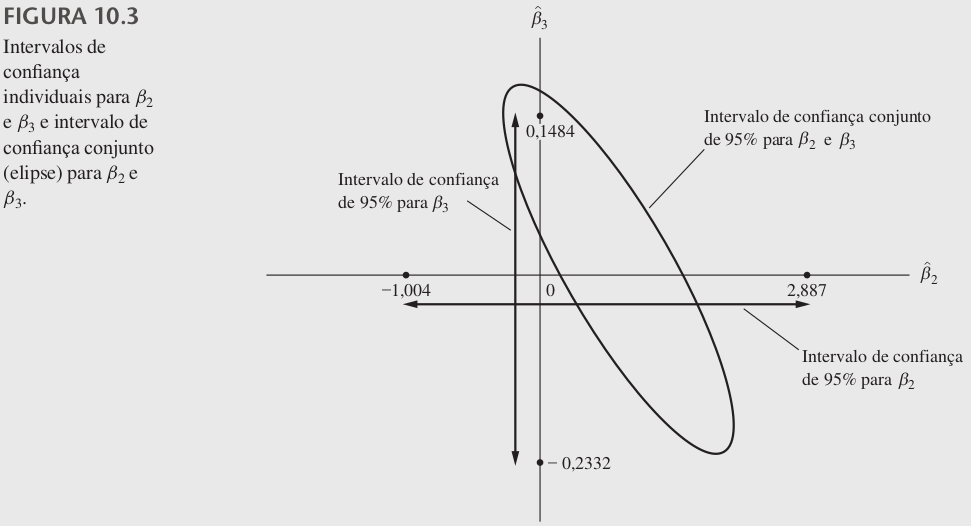

In [20]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_figura_10.3.png')

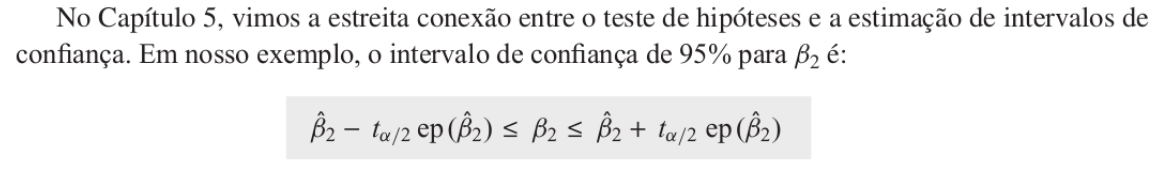

In [21]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/secao_8.3_1.png')

**stats.t.ppf()**
* Calcula o valor t de acordo com nível de significancia escolhido.
* ".ppf()" --> Percent point function (inverse of cdf — percentiles).
* "q"   --> quantile - nível de significancia desejado
* "df"   --> graus de liberdade 

In [22]:
# intervalo beta 2
valor_t = stats.t.ppf(q = 0.975, df = 7)

beta2 = model.params[1]

ep = model.bse[1]

In [23]:
# Limite inferior
beta2 - ((valor_t)*ep)

-1.0043078460104244

In [24]:
#limite superior
beta2 + ((valor_t)*ep)

2.8873825307824488

In [25]:
# intervalo beta 3
valor_t = stats.t.ppf(q = 0.975, df = 7)

beta3 = model.params[2]

ep = model.bse[2]

In [26]:
# Limite Inferior
beta3 - ((valor_t)*ep)

-0.23317572312763907

In [27]:
#limite Superior
beta3 + ((valor_t)*ep)

0.1483066639617846

# Exemplo 10.2

In [28]:
data = pd.read_excel('./datasets/tabela_10.7.xlsx')

In [29]:
data.head()

,ano,consumo,renda,riqueza,taxa
0,1947,976.4000,1035.2000,5166.8150,-10.3509
1,1948,998.1000,1090.0000,5280.7570,-4.7198
2,1949,1025.3000,1095.6000,5607.3510,1.0441
3,1950,1090.9000,1192.7000,5759.5150,0.4073
4,1951,1107.1000,1227.0000,6086.0560,-5.2832


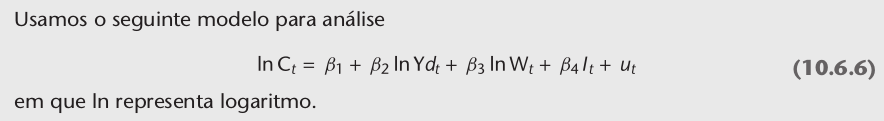

In [30]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.2_1.png')

In [31]:
data['renda']   = np.log(data['renda'])
data['consumo'] = np.log(data['consumo'])
data['riqueza'] = np.log(data['riqueza'])

In [32]:
x = data[['renda','riqueza','taxa']]
y = data['consumo']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predict = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.783e+04
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           7.12e-84
Time:                        20:56:03   Log-Likelihood:                 164.59
No. Observations:                  54   AIC:                            -321.2
Df Residuals:                      50   BIC:                            -313.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4677      0.043    -10.933      0.0

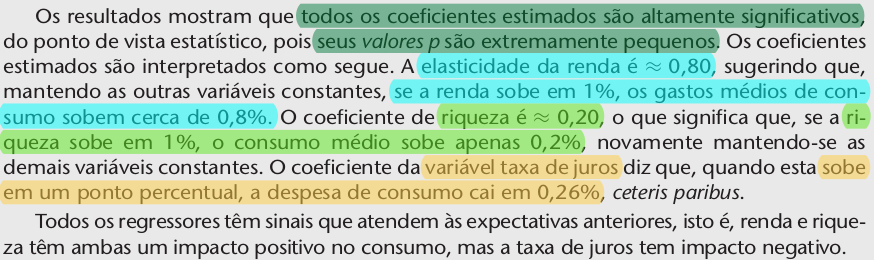

In [33]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.2_2.png')

In [34]:
model.params

const     -0.4677
renda      0.8049
riqueza    0.2013
taxa      -0.0027
dtype: float64

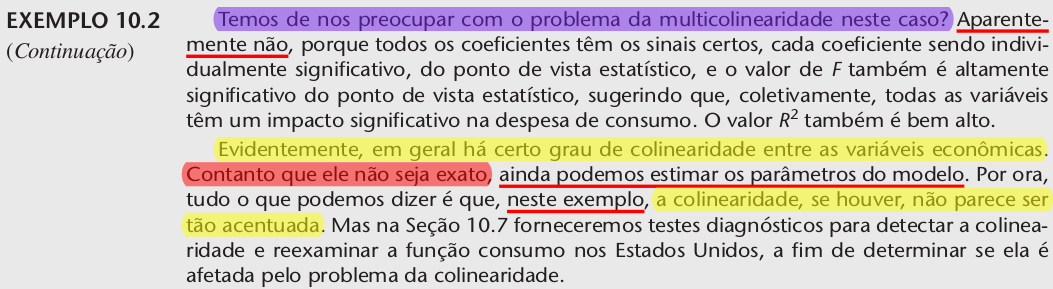

In [35]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_exemplo_10.2_3.png')

# Seção 10.7 Detecção da Multicolinearidade

## Regra prática 5 - Autovalores e índice condicional

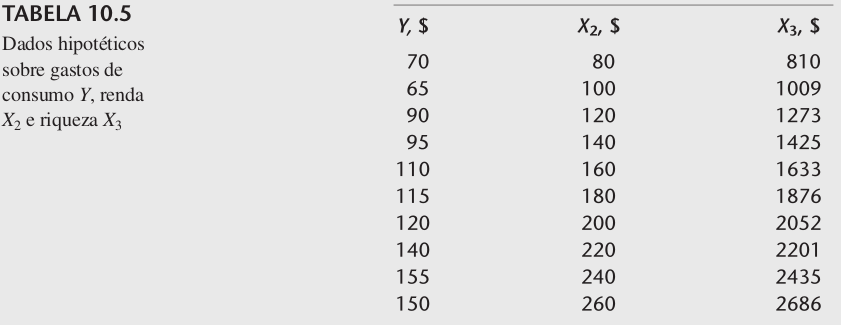

In [36]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/cap_10_tabela_10.5.png')

In [37]:
aux1 = {'consumo':[70,65,90,95,110,115,120,140,155,150],
        'renda':[80,100,120,140,160,180,200,220,240,260],
        'riqueza':[810,1009,1273,1425,1633,1876,2052,2201,2435,2686]}

data = pd.DataFrame(aux1)

In [38]:
data

,consumo,renda,riqueza
0,70,80,810
1,65,100,1009
2,90,120,1273
3,95,140,1425
4,110,160,1633
5,115,180,1876
6,120,200,2052
7,140,220,2201
8,155,240,2435
9,150,260,2686


In [39]:
#statsmodels
x = data[['renda','riqueza']]
y = data['consumo']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     92.40
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           9.29e-06
Time:                        20:56:03   Log-Likelihood:                -31.587
No. Observations:                  10   AIC:                             69.17
Df Residuals:                       7   BIC:                             70.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7747      6.752      3.669      0.0

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


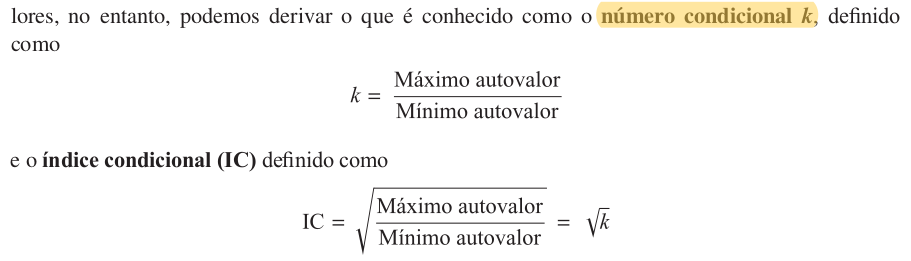

In [40]:
Image('./imagens/cap_10_secao_10.7_2.png')

https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

In [41]:
# O primeiro passo é normalizar as variáveis independentes para que tenham comprimento unitário:
norm_x = x.values
for i, name in enumerate(x):
    if name == "const":
        continue
    norm_x[:, i] = x[name] / np.linalg.norm(x[name])
norm_xtx = np.dot(norm_x.T, norm_x)

In [42]:
# Calcular autovalor -eigenvalue
eigs = np.linalg.eigvals(norm_xtx)

# Calcular numero condicional - conditional number
k = eigs.max() / eigs.min()

# Calcular indice condicional - conditional index
condition_index = np.sqrt(k)

print('condition_number: {}'.format(k))
print('condition_index: {}'.format(condition_index))

condition_number: 111553.21403453156
condition_index: 333.99582936697215


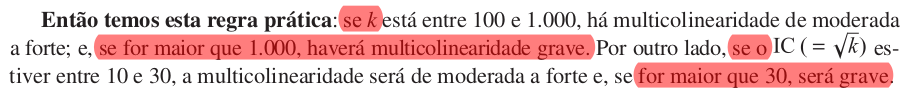

In [43]:
Image('./imagens/cap_10_secao_10.7_1.png')

# Seção 10.8 Medidas Corretivas

## Exercício 10.26 - Combinando dados de corte transversal e de séries temporais.

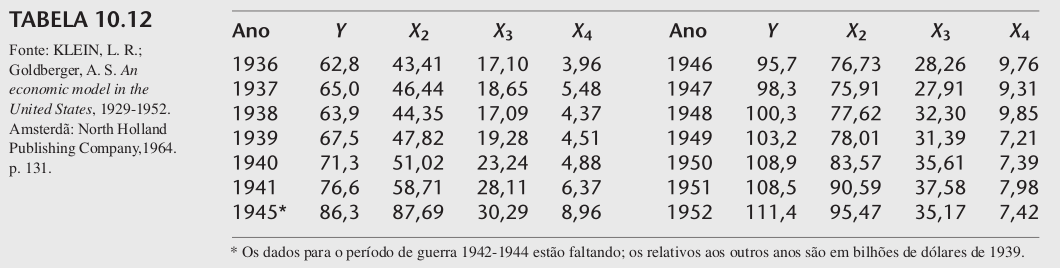

In [44]:
Image('./imagens/cap_10_tabela_10.2.png')

In [45]:
data = pd.read_excel('./datasets/tabela_10.12.xlsx')
data

,ano,consumo,renda_salarial,renda_nao_agricola,renda_agricola
0,1936,62.8000,43.4100,17.1000,3.9600
1,1937,65.0000,46.4400,18.6500,5.4800
2,1938,63.9000,44.3500,17.0900,4.3700
3,1939,67.5000,47.8200,19.2800,4.5100
4,1940,71.3000,51.0200,23.2400,4.8800
5,1941,76.6000,58.7100,28.1100,6.3700
6,1945,86.3000,87.6900,30.2900,8.9600
7,1946,95.7000,76.7300,28.2600,9.7600
8,1947,98.3000,75.9100,27.9100,9.3100
9,1948,100.3000,77.6200,32.3000,9.8500


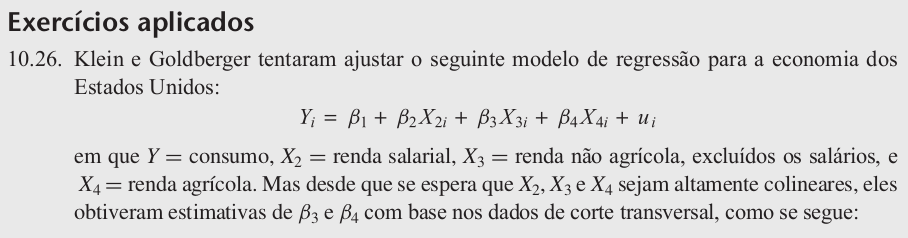

In [46]:
Image('./imagens/cap_10_exercicio_10.26_1.png')

In [47]:
data.columns

Index(['ano', 'consumo', 'renda_salarial', 'renda_nao_agricola',
       'renda_agricola'],
      dtype='object')

In [48]:
x = data[['renda_salarial', 'renda_nao_agricola','renda_agricola']]
y = data['consumo']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     37.68
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           9.27e-06
Time:                        20:56:04   Log-Likelihood:                -42.734
No. Observations:                  14   AIC:                             93.47
Df Residuals:                      10   BIC:                             96.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.7021      6

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Valores p coeficientes acima de 5%**

* Alta colineariadade compromete a significância estatística

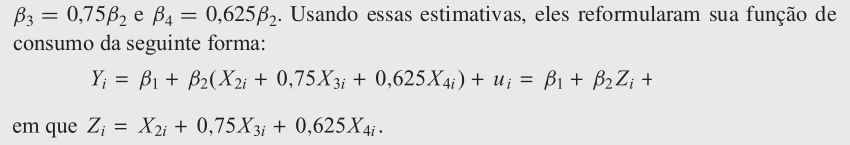

In [49]:
Image('./imagens/cap_10_exercicio_10.26_2.png')

In [50]:
data['z'] = data.apply(lambda x: (x['renda_salarial'] + (0.75*x['renda_nao_agricola']) + (0.625*x['renda_agricola']) ), axis = 1 )

In [51]:
data

,ano,consumo,renda_salarial,renda_nao_agricola,renda_agricola,z
0,1936,62.8000,43.4100,17.1000,3.9600,58.7100
1,1937,65.0000,46.4400,18.6500,5.4800,63.8525
2,1938,63.9000,44.3500,17.0900,4.3700,59.8988
3,1939,67.5000,47.8200,19.2800,4.5100,65.0987
4,1940,71.3000,51.0200,23.2400,4.8800,71.5000
5,1941,76.6000,58.7100,28.1100,6.3700,83.7738
6,1945,86.3000,87.6900,30.2900,8.9600,116.0075
7,1946,95.7000,76.7300,28.2600,9.7600,104.0250
8,1947,98.3000,75.9100,27.9100,9.3100,102.6612
9,1948,100.3000,77.6200,32.3000,9.8500,108.0012


In [52]:
x = data[['z']]
y = data['consumo']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        20:56:04   Log-Likelihood:                -43.733
No. Observations:                  14   AIC:                             91.47
Df Residuals:                      12   BIC:                             92.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9945      6.341      3.311      0.0

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Cálculo dos betas

In [53]:
model.params

const   20.9945
z        0.7096
dtype: float64

In [54]:
beta1 = model.params[0]
beta1

20.99451639541809

In [55]:
beta2 = model.params[1]
beta2

0.7095536114921344

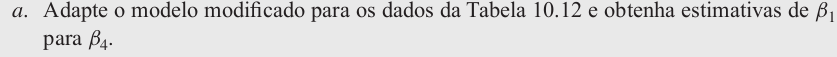

In [56]:
Image('./imagens/cap_10_exercicio_10.26_3.png')

In [57]:
beta3 = 0.75 * beta2
beta3

0.5321652086191008

In [58]:
beta4 = 0.625 * beta2
beta4

0.443471007182584

### Variável Z

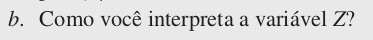

In [59]:
Image('./imagens/cap_10_exercicio_10.26_5.png')

**Variável Z: Representa o valor da renda dos salários ($x_{2}$) após somamos o efeito da renda não agricola ($x_{3}$) e da renda agricola ($x_{4}$)**

# 10.10 Um exemplo ampliado: os dados de Longley

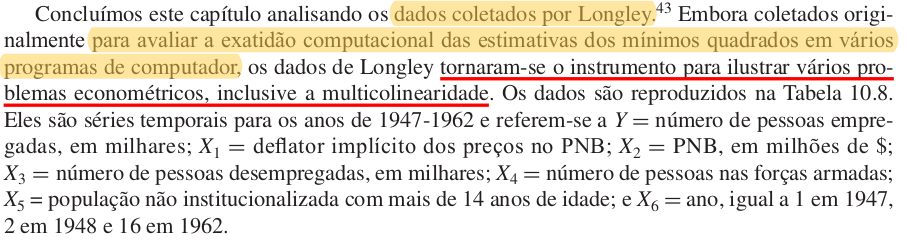

In [60]:
Image('./imagens/cap_10_secao_10.10_1.png')

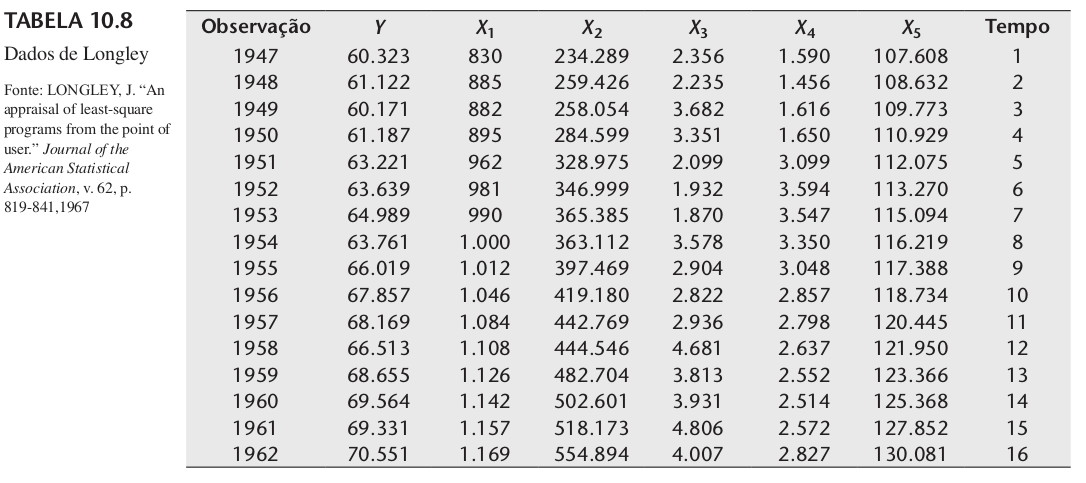

In [61]:
Image('./imagens/cap_10_tabela_10.8.png')

In [62]:
data = pd.read_csv('./datasets/tabela_10.8_1.csv')
data

,observacao,empregadas,deflator_preco,pnb,desempregadas,militar,no_insti,tempo
0,1947,60323,830,234289,2356,1590,107608,1
1,1948,61122,885,259426,2235,1456,108632,2
2,1949,60171,882,258054,3682,1616,109773,3
3,1950,61187,895,284599,3351,1650,110929,4
4,1951,63221,962,328975,2099,3099,112075,5
5,1952,63639,981,346999,1932,3594,113270,6
6,1953,64989,990,365385,1870,3547,115094,7
7,1954,63761,1000,363112,3578,3350,116219,8
8,1955,66019,1012,397469,2904,3048,117388,9
9,1956,67857,1046,419180,2822,2857,118734,10


In [63]:
x = data[['deflator_preco', 'pnb', 'desempregadas', 'militar', 'no_insti', 'tempo']]
y = data['empregadas']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             empregadas   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     313.0
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           6.34e-10
Time:                        20:56:04   Log-Likelihood:                -110.05
No. Observations:                  16   AIC:                             234.1
Df Residuals:                       9   BIC:                             239.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.225e+04   2.25e+04      3.

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Matriz de correlações

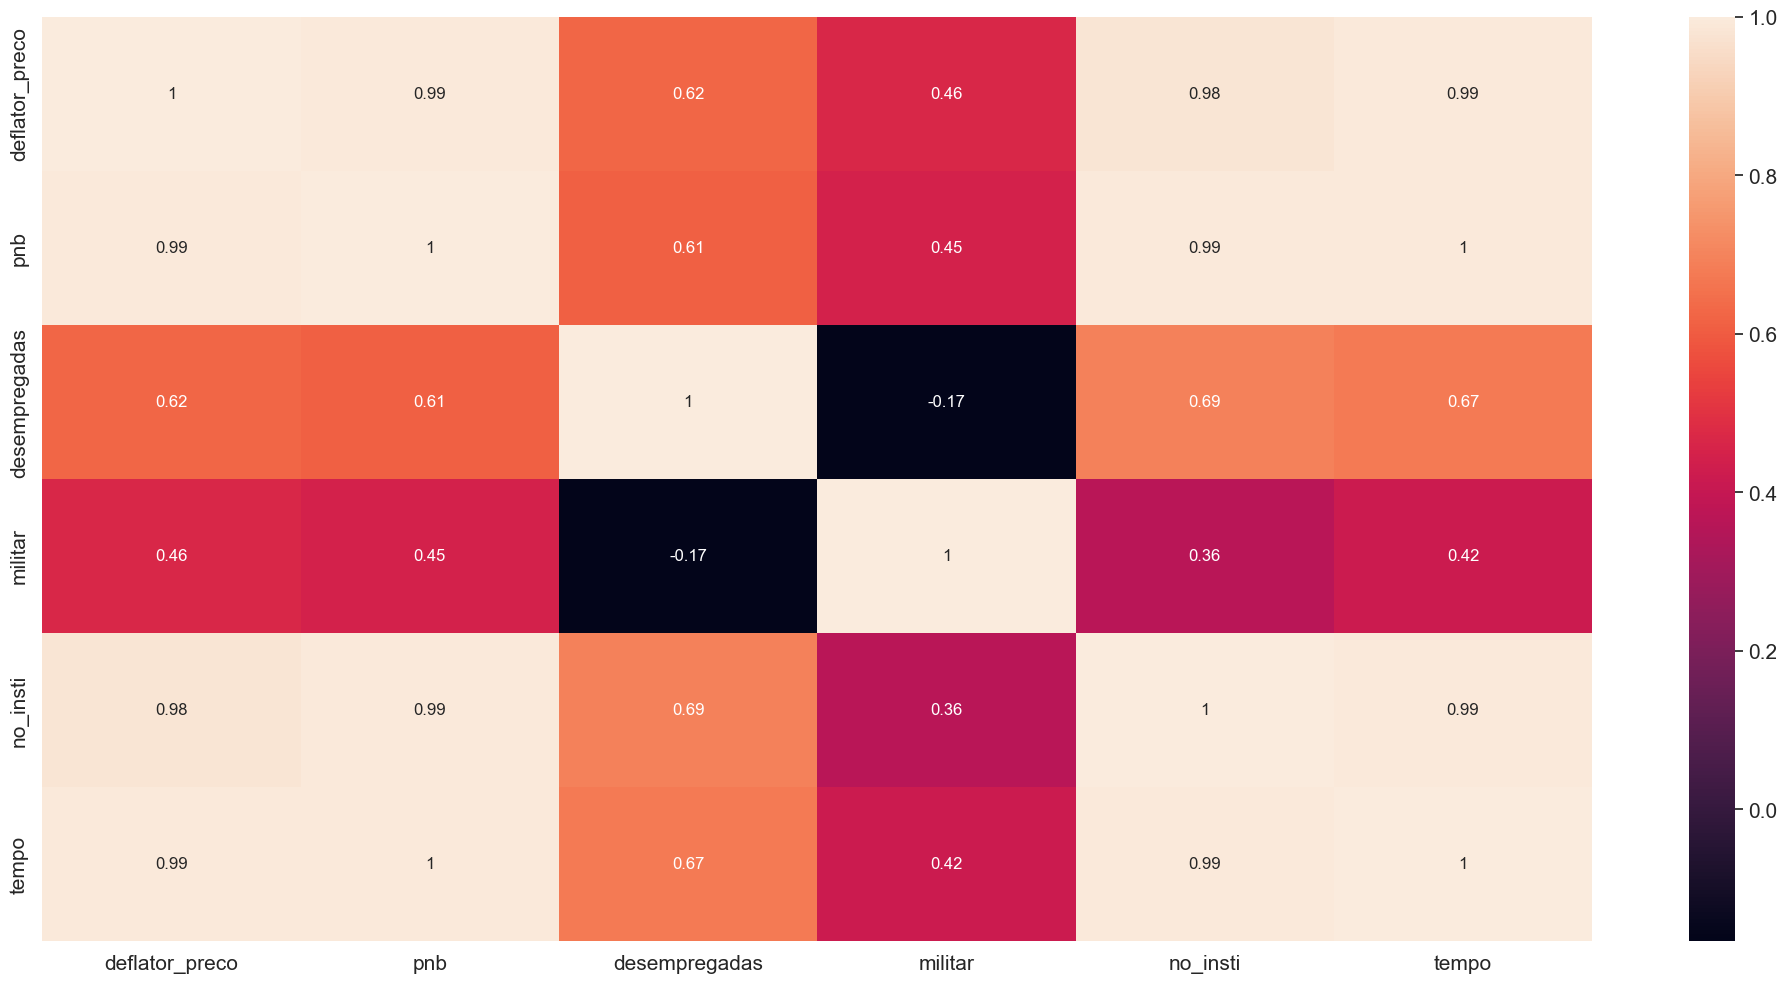

In [64]:
correlation = data[['deflator_preco', 'pnb', 'desempregadas', 'militar', 'no_insti', 'tempo']].corr( method = 'pearson' )
sns.heatmap( correlation, annot = True );

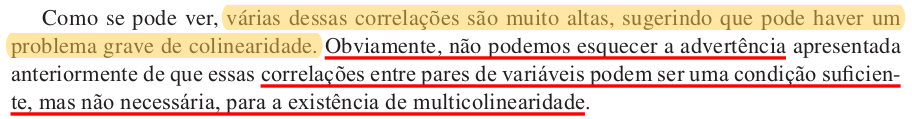

In [65]:
Image('./imagens/cap_10_secao_10.10_3.png')

## Regressões auxiliares

### Calculos dos R2

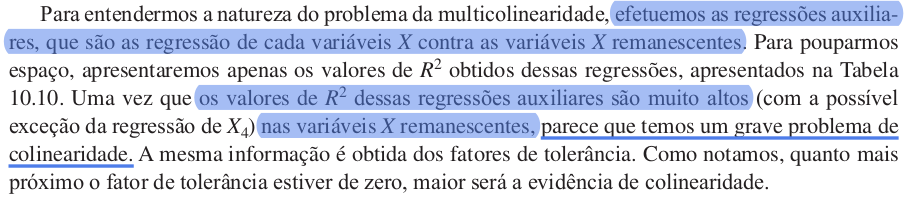

In [66]:
Image('./imagens/cap_10_secao_10.10_4.png')

In [67]:
# R-squared model geral: 0.995

In [68]:
aux1 = data[['deflator_preco', 'pnb', 'desempregadas', 'militar', 'no_insti','tempo']].copy()
features_2 = list(aux1.columns)
r2  = []
tol = []
for i in aux1.columns:
    
    y = aux1[[i]].copy()
    features_2.remove(i)
    x = aux1[features_2]
    features_2 = list(aux1.columns)
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    predictions = model.predict(x)
    r2.append(model.rsquared)
    aux2 = 1- model.rsquared
    tol.append(aux2)
    
data_r = pd.DataFrame()
data_r['var_dep'] = list(aux1.columns)
data_r['r2']  = r2
data_r['tol'] = tol  


In [69]:
data_r

,var_dep,r2,tol
0,deflator_preco,0.9921,0.0079
1,pnb,0.9994,0.0006
2,desempregadas,0.9684,0.0316
3,militar,0.6996,0.3004
4,no_insti,0.9974,0.0026
5,tempo,0.9987,0.0013


In [70]:
# R-squared model geral: 0.995

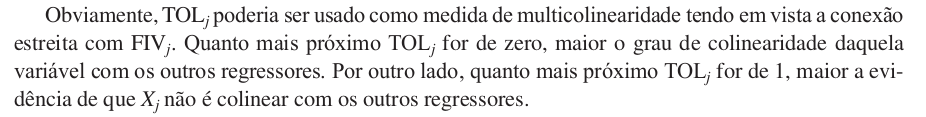

In [71]:
Image('./imagens/cap_10_secao_10.10_2.png')

## diagrama de dispersão

In [72]:
aux1.head()

,deflator_preco,pnb,desempregadas,militar,no_insti,tempo
0,830,234289,2356,1590,107608,1
1,885,259426,2235,1456,108632,2
2,882,258054,3682,1616,109773,3
3,895,284599,3351,1650,110929,4
4,962,328975,2099,3099,112075,5


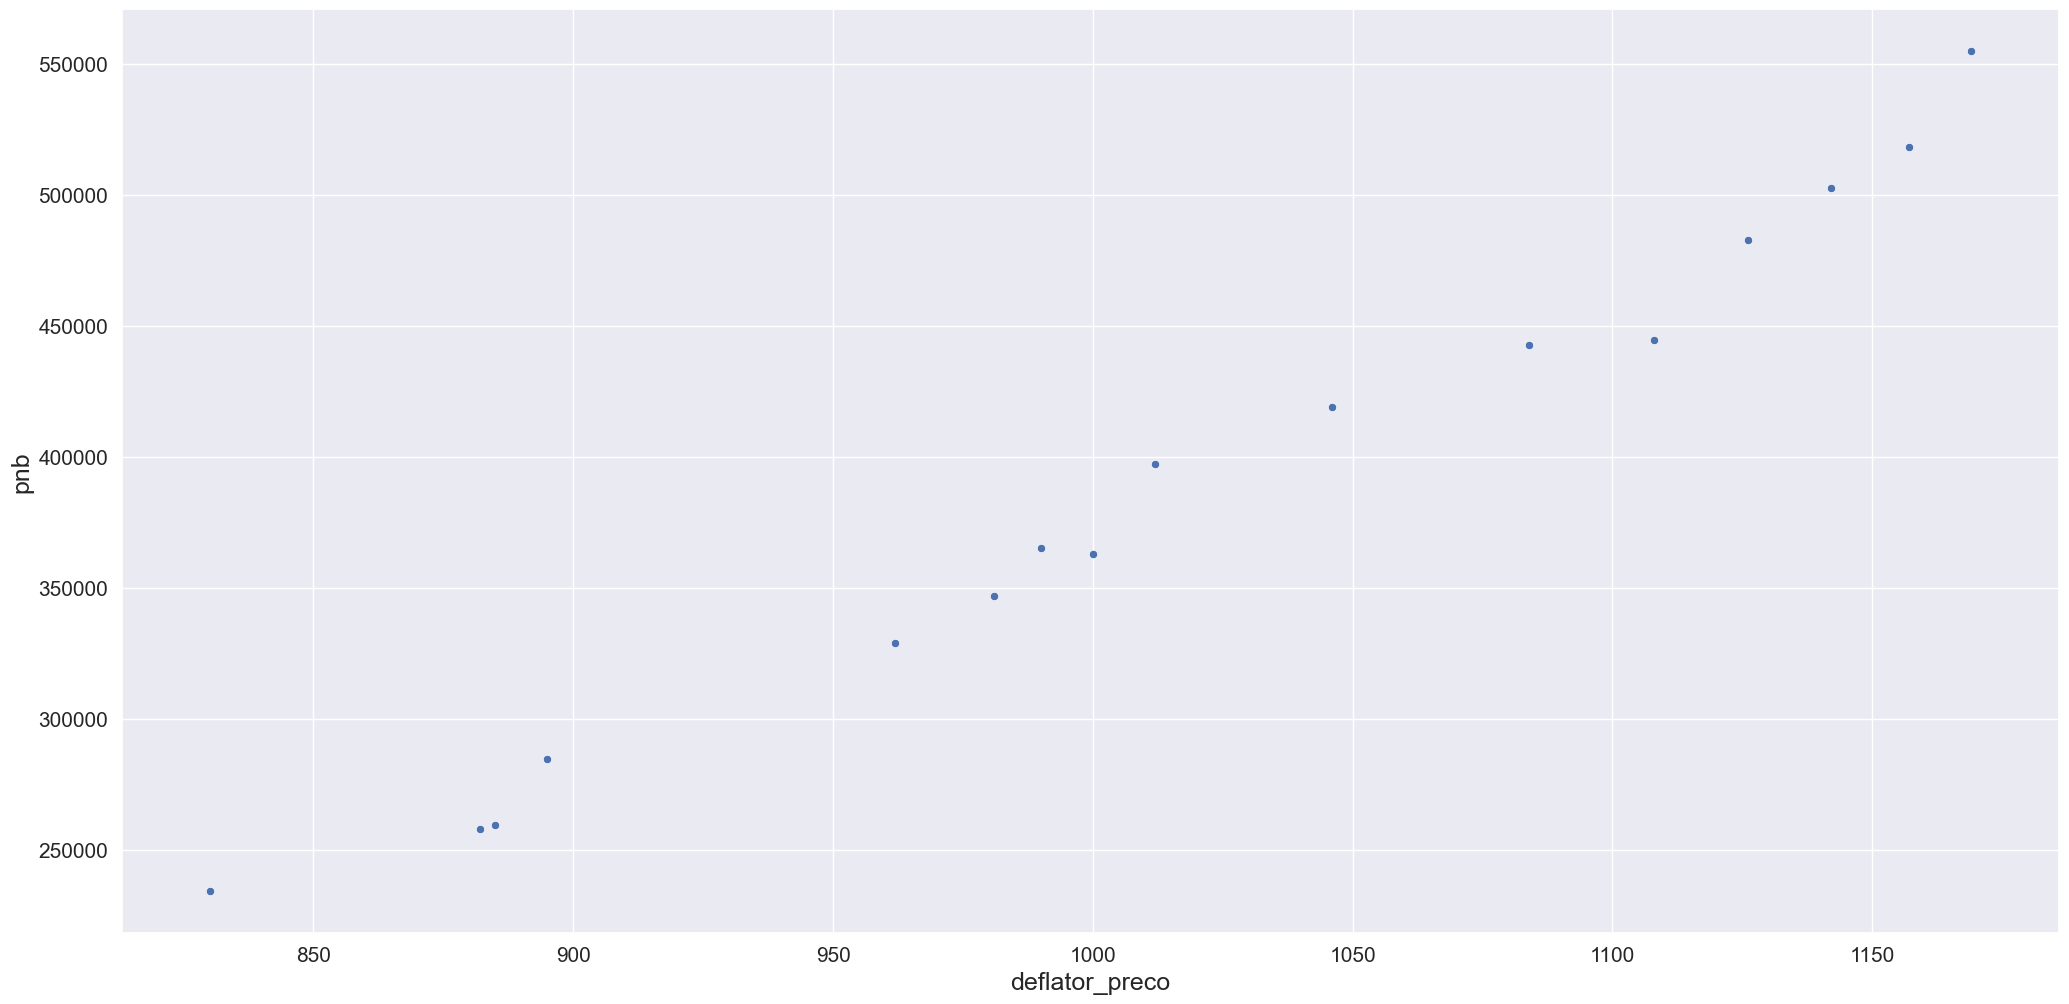

In [73]:
sns.scatterplot(data = aux1, x = aux1['deflator_preco'], y = 'pnb');

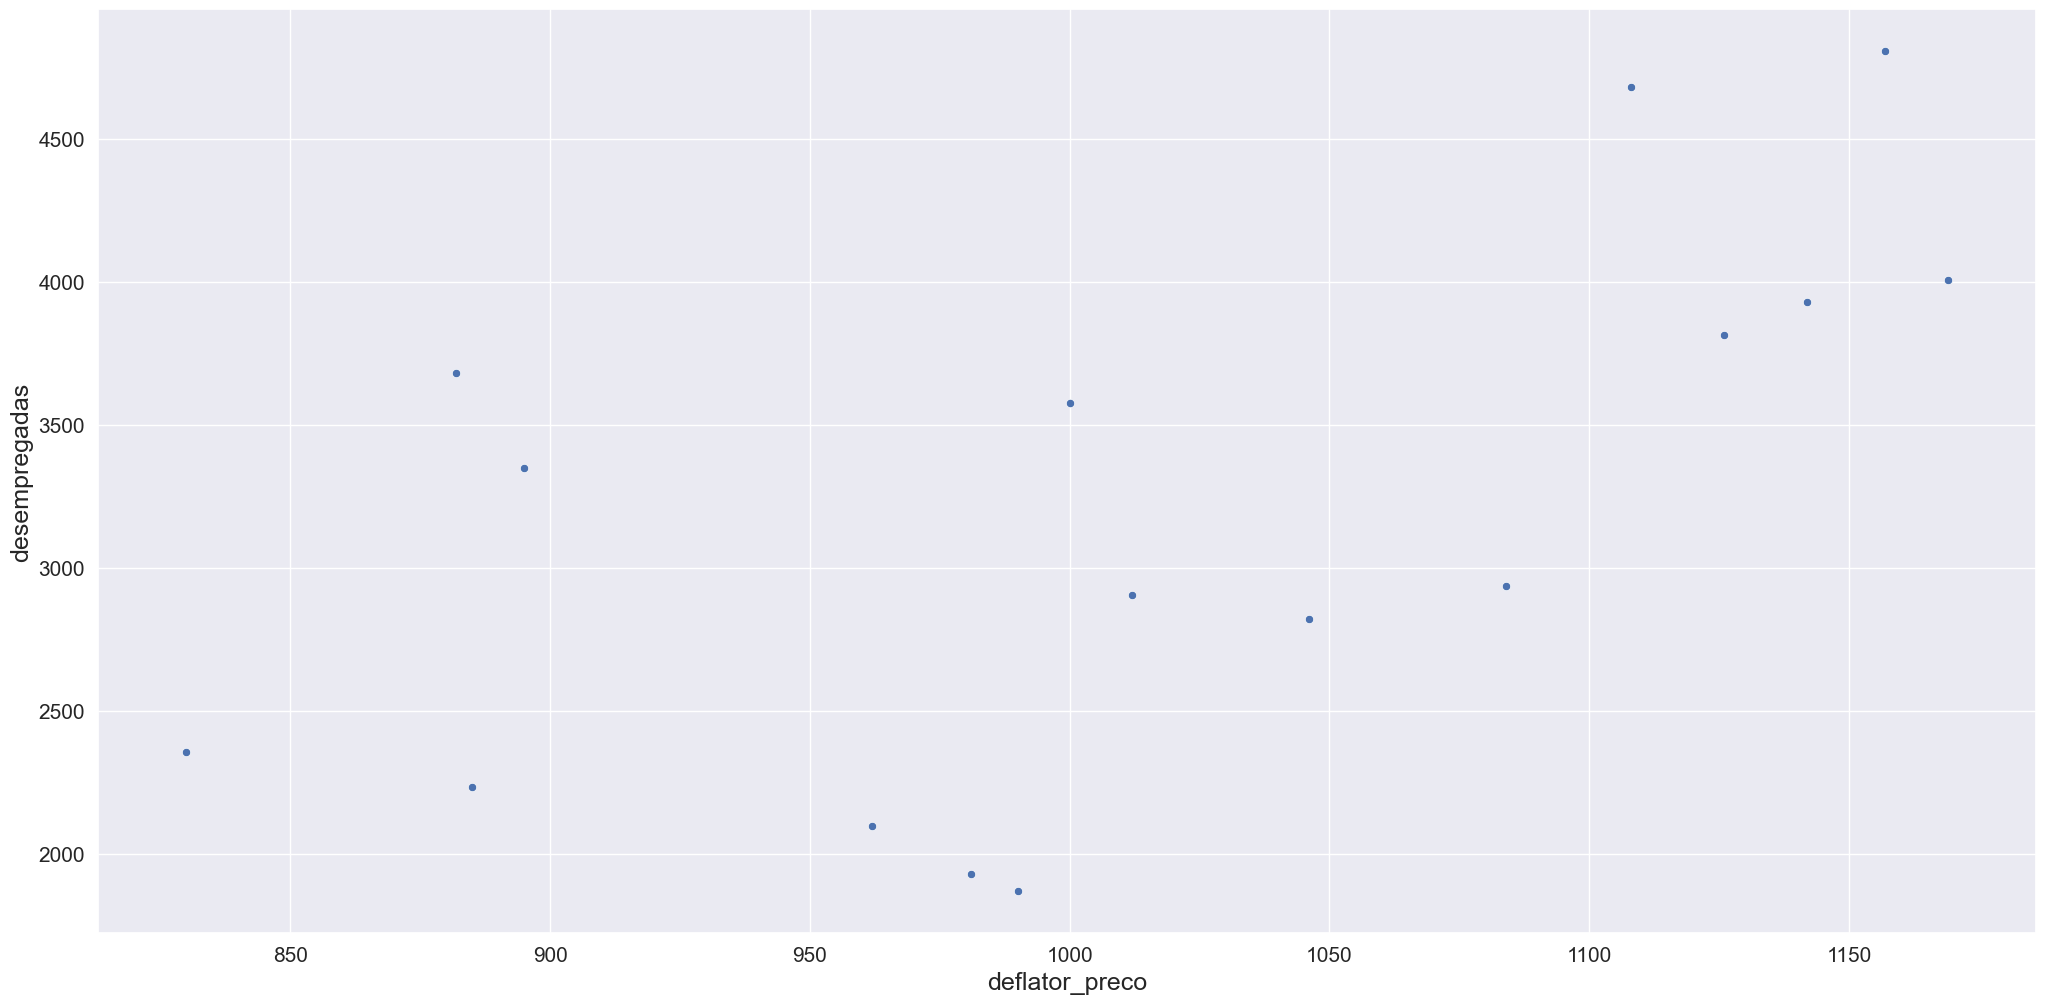

In [74]:
sns.scatterplot(data = aux1, x = aux1['deflator_preco'], y = 'desempregadas');

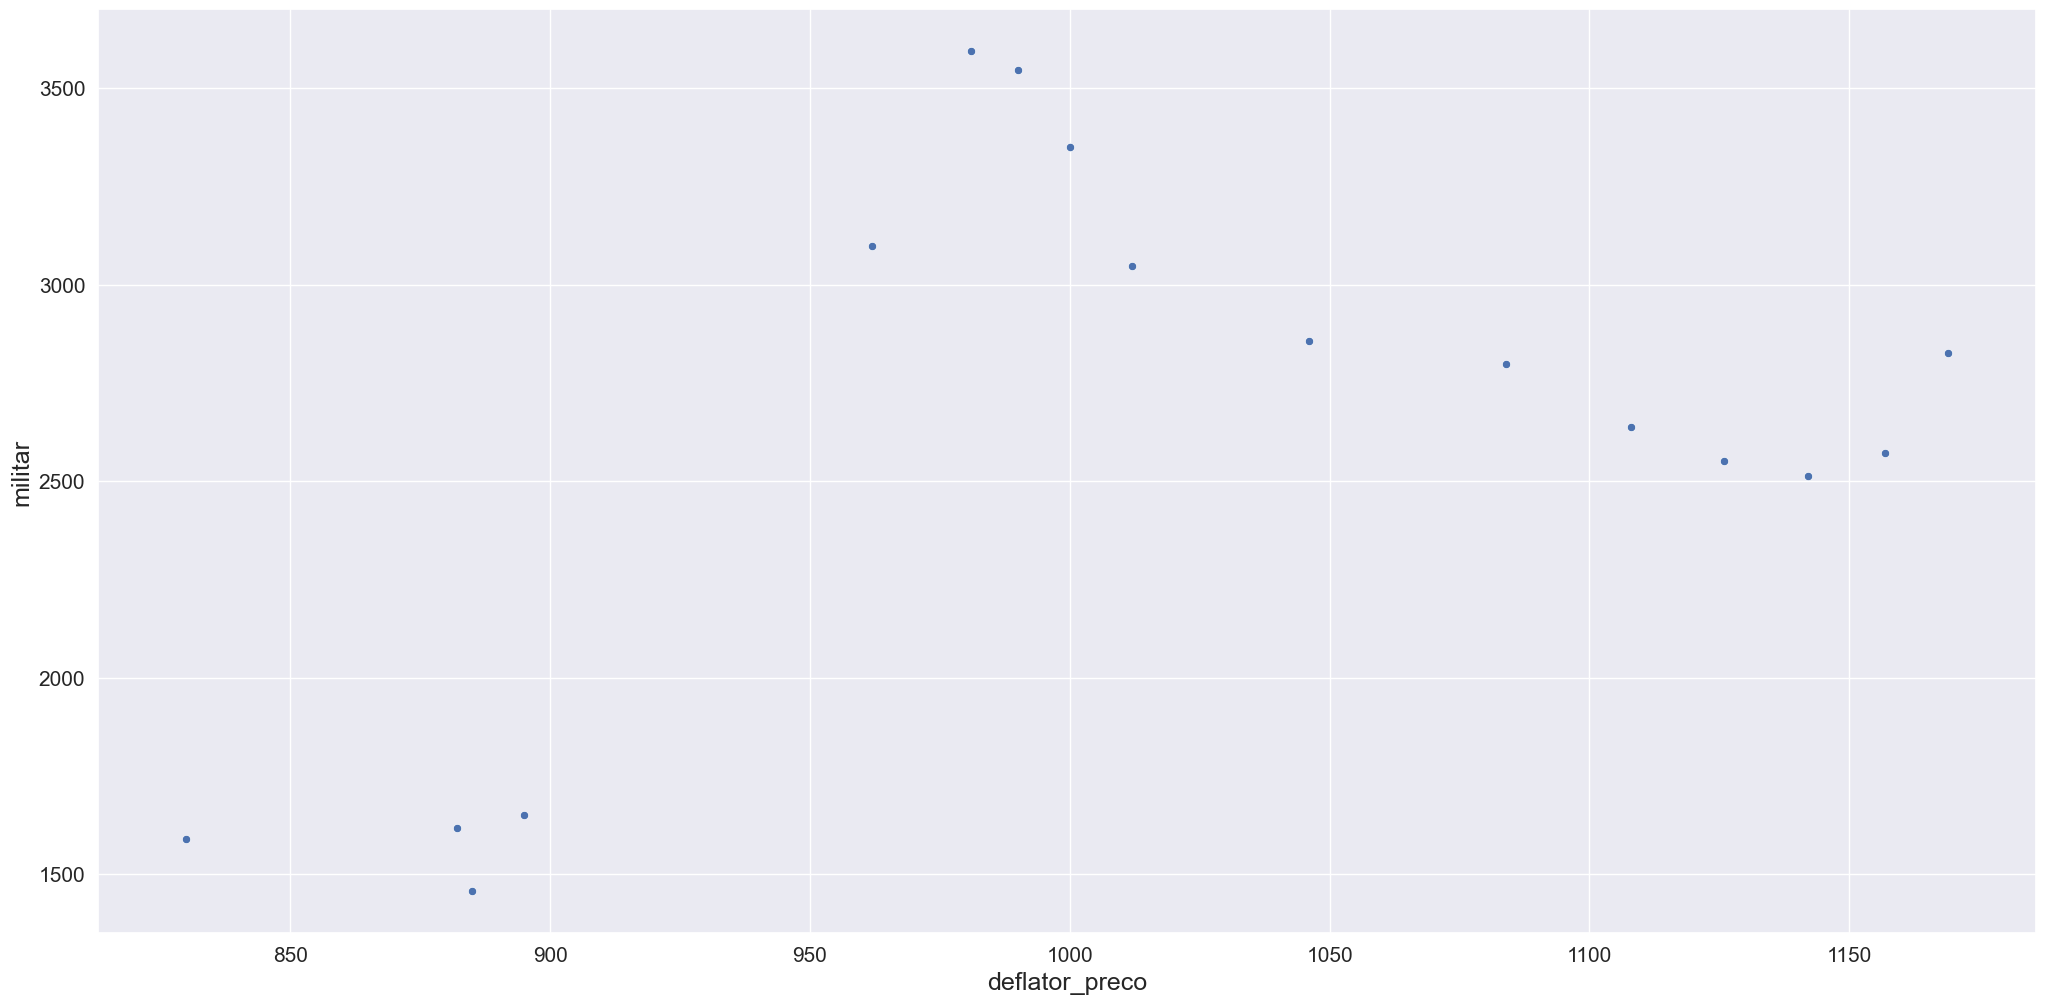

In [75]:
sns.scatterplot(data = aux1, x = aux1['deflator_preco'], y = 'militar');

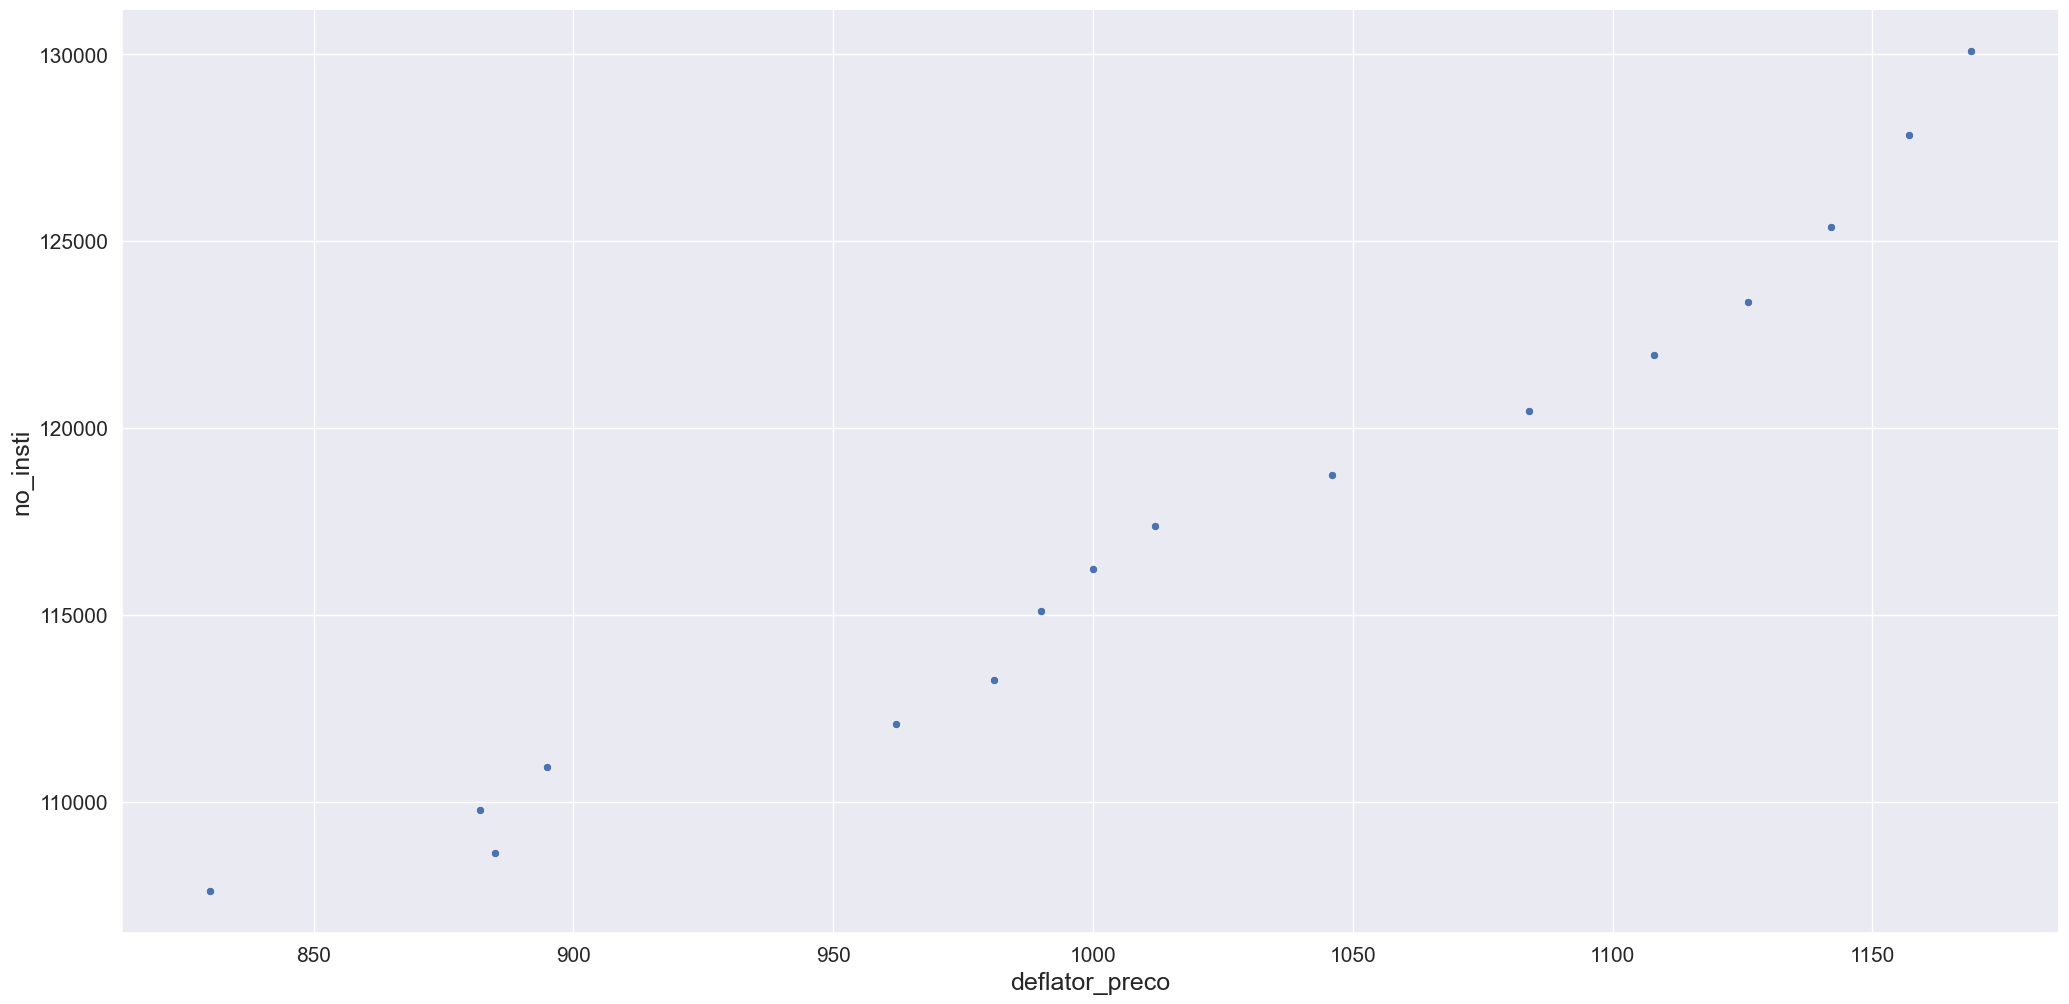

In [76]:
sns.scatterplot(data = aux1, x = aux1['deflator_preco'], y = 'no_insti');

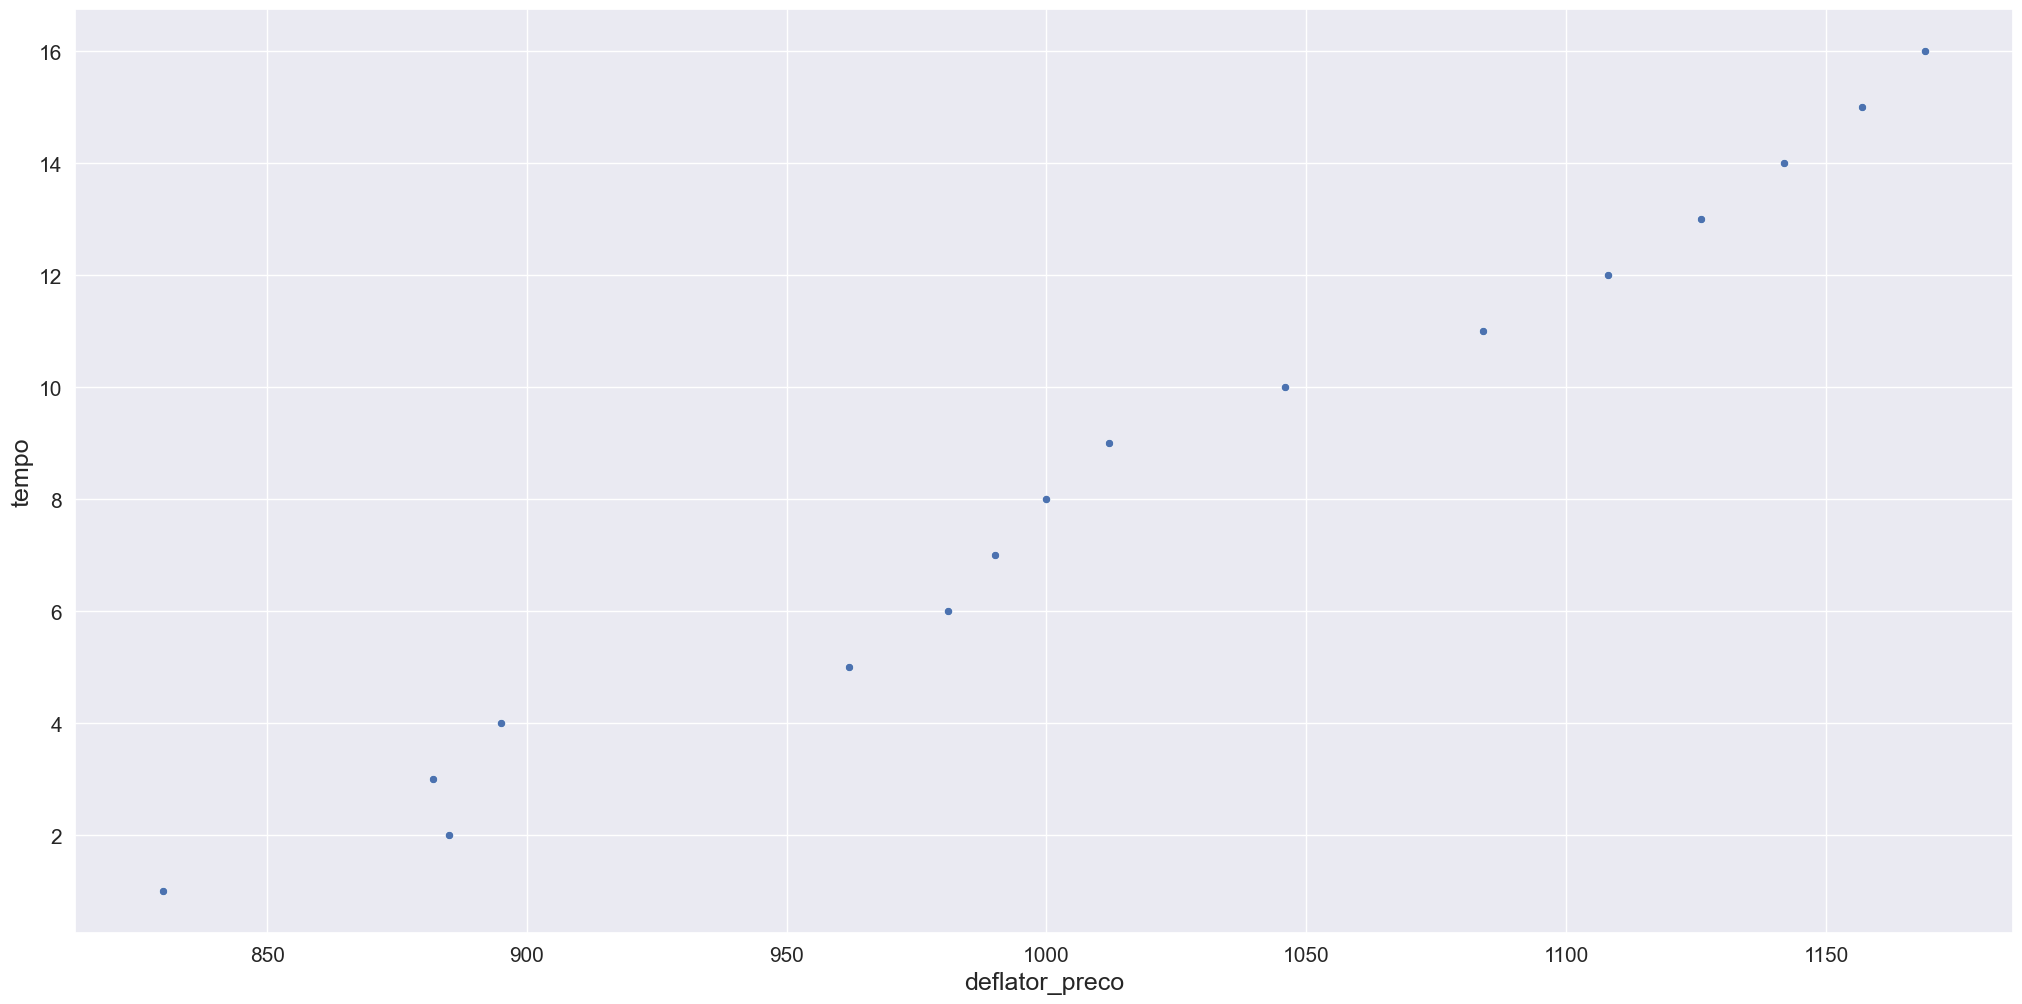

In [77]:
sns.scatterplot(data = aux1, x = aux1['deflator_preco'], y = 'tempo');